In [1]:
import torch

Making sense of positional encoding [https://kazemnejad.com/blog/transformer_architecture_positional_encoding/]

<img src="Images/positional_encoding.png" alt="drawing" width="500"/><br>

In [31]:
max_seq = 50
d_model = 128

$$
PE(position, i) = sin(\frac{pos}{1000^{\frac{i}{d_{model}}}})\text{if i is even}\\
\\
PE(position, i) = cos(\frac{pos}{1000^{\frac{i-1}{d_{model}}}})\text{if i is odd}
$$

In [32]:
# Along the rows.
even_denominator = 1000**(torch.arange(0, d_model, 2)/d_model)
odd_denominator = 1000**((torch.arange(1, d_model, 2)-1)/d_model)
(even_denominator == odd_denominator).all()

tensor(True)

In [37]:
denominator = even_denominator
print(denominator.shape)

torch.Size([64])


In [34]:
positions = torch.arange(0,  max_seq, dtype=torch.float).unsqueeze(1)
positions.shape

torch.Size([50, 1])

In [50]:
# Along the columns (sequence).
even_pe = torch.sin(positions/denominator)
odd_pe = torch.cos(positions/denominator)

In [51]:
# Stack the two tensors together along the second axis
stack = torch.stack([even_pe, odd_pe], dim=2)
stack_flatten = torch.flatten(stack, start_dim=1, end_dim=2)
print(stack.shape)
print(stack_flatten.shape)

torch.Size([50, 64, 2])
torch.Size([50, 128])


In [52]:
print(stack_flatten[1])
print(even_pe[1])
print(odd_pe[1])

tensor([0.8415, 0.5403, 0.7819, 0.6234, 0.7214, 0.6925, 0.6619, 0.7496, 0.6047,
        0.7965, 0.5505, 0.8348, 0.4997, 0.8662, 0.4527, 0.8917, 0.4093, 0.9124,
        0.3696, 0.9292, 0.3333, 0.9428, 0.3003, 0.9538, 0.2704, 0.9627, 0.2434,
        0.9699, 0.2189, 0.9758, 0.1968, 0.9804, 0.1769, 0.9842, 0.1590, 0.9873,
        0.1428, 0.9897, 0.1283, 0.9917, 0.1152, 0.9933, 0.1035, 0.9946, 0.0929,
        0.9957, 0.0834, 0.9965, 0.0749, 0.9972, 0.0673, 0.9977, 0.0604, 0.9982,
        0.0542, 0.9985, 0.0487, 0.9988, 0.0437, 0.9990, 0.0392, 0.9992, 0.0352,
        0.9994, 0.0316, 0.9995, 0.0284, 0.9996, 0.0255, 0.9997, 0.0229, 0.9997,
        0.0205, 0.9998, 0.0184, 0.9998, 0.0165, 0.9999, 0.0149, 0.9999, 0.0133,
        0.9999, 0.0120, 0.9999, 0.0107, 0.9999, 0.0096, 1.0000, 0.0087, 1.0000,
        0.0078, 1.0000, 0.0070, 1.0000, 0.0063, 1.0000, 0.0056, 1.0000, 0.0050,
        1.0000, 0.0045, 1.0000, 0.0041, 1.0000, 0.0037, 1.0000, 0.0033, 1.0000,
        0.0029, 1.0000, 0.0026, 1.0000, 

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

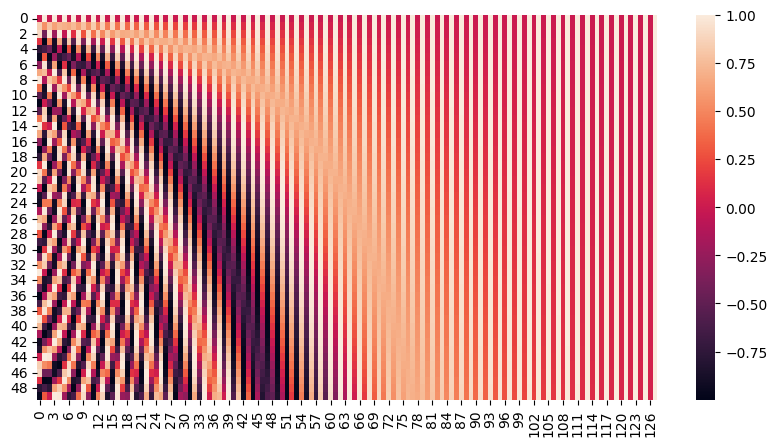

In [54]:
# Representing the position encoding of given sequence.
plt.figure(figsize=(10, 5))
sns.heatmap(stack_flatten)

<Axes: >

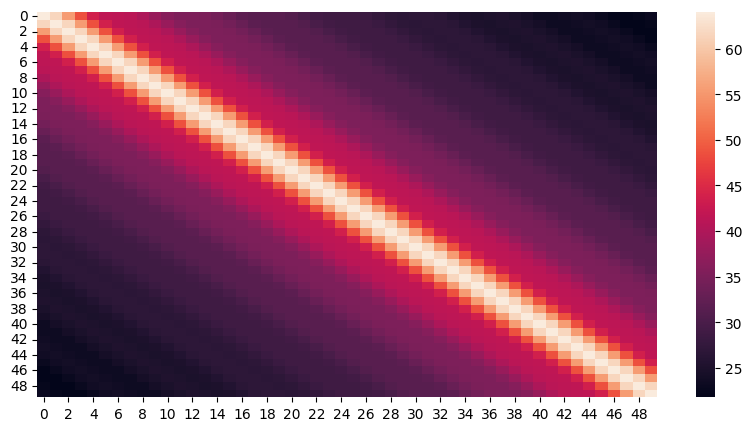

In [58]:
# Representing the distance between positions in position encoding matrix.
plt.figure(figsize=(10, 5))
sns.heatmap(stack_flatten@stack_flatten.T)

In [55]:
stack_flatten

tensor([[ 0.0000,  1.0000,  0.0000,  ...,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.7819,  ...,  1.0000,  0.0011,  1.0000],
        [ 0.9093, -0.4161,  0.9749,  ...,  1.0000,  0.0022,  1.0000],
        ...,
        [ 0.1236, -0.9923, -0.9759,  ...,  0.9983,  0.0523,  0.9986],
        [-0.7683, -0.6401, -0.7792,  ...,  0.9982,  0.0534,  0.9986],
        [-0.9538,  0.3006,  0.0044,  ...,  0.9982,  0.0546,  0.9985]])

In [59]:
import torch.nn as nn

In [60]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model:int, max_seq:int) -> None:
        super().__init__()
        self.max_seq = max_seq
        self.d_model = d_model

    def forward(self) -> torch.Tensor:
        denominator = 1000**(torch.arange(0, self.d_model, 2)/self.d_model)
        positions = torch.arange(0,  self.max_seq, dtype=torch.float).unsqueeze(1)
        even_pe = torch.sin(positions/denominator)
        odd_pe = torch.cos(positions/denominator)
        stack = torch.stack([even_pe, odd_pe], dim=2)
        encoded_pos = torch.flatten(stack, start_dim=1, end_dim=2)
        return encoded_pos